In [1]:
import sqlite3

def sql_i(instruction,data_b="data1.db"):
    conn=sqlite3.connect(data_b)
    cur=conn.cursor()
    cur.execute(instruction)
    if "select" in instruction.lower() or "pragma" in instruction.lower():
        rows=cur.fetchall()
        conn.close()
        return(rows)
    else:
        conn.commit()  
        conn.close()

In [2]:
sql_i('DROP TABLE EMPLOYEES')
sql_i('DROP TABLE JOB_HISTORY')
sql_i('DROP TABLE JOBS')
sql_i('DROP TABLE DEPARTMENTS')
sql_i('DROP TABLE LOCATIONS')

In [3]:
sql_i('''
CREATE TABLE IF NOT EXISTS EMPLOYEES (
                          EMP_ID CHAR(9) NOT NULL,
                          F_NAME VARCHAR(15) NOT NULL,
                          L_NAME VARCHAR(15) NOT NULL,
                          SSN CHAR(9),
                          B_DATE DATE,
                          SEX CHAR,
                          ADDRESS VARCHAR(30),
                          JOB_ID CHAR(9),
                          SALARY DECIMAL(10,2),
                          MANAGER_ID CHAR(9),
                          DEP_ID CHAR(9) NOT NULL,
                          PRIMARY KEY (EMP_ID)
                        )
''')

In [4]:
EMPLOYEES_cols=("EMP_ID","F_NAME"," L_NAME"," SSN","B_DATE","SEX","ADDRESS","JOB_ID","SALARY","MANAGER_ID","DEP_ID")

In [5]:
sql_i('''
INSERT INTO EMPLOYEES VALUES
    ('E1001','John','Thomas','123456','1976-01-09','M','5631 Rice, OakPark,IL','100',100000.00,'30001','2'),
    ('E1002','Alice','James','123457','1972-07-31','F','980 Berry ln, Elgin,IL','200',80000.00,'30002','5'),
    ('E1003','Steve','Wells','123458','1980-08-10','M','291 Springs, Gary,IL','300',50000.00,'30002','5'),
    ('E1004','Santosh','Kumar','123459','1985-07-20','M','511 Aurora Av, Aurora,IL','400',60000.00,'30004','5'),
    ('E1005','Ahmed','Hussain','123410','1981-01-04','M','216 Oak Tree, Geneva,IL','500',70000.00,'30001','2'),
    ('E1006','Nancy','Allen','123411','1978-02-06','F','111 Green Pl, Elgin,IL','600',90000.00,'30001','2'),
    ('E1007','Mary','Thomas','123412','1975-05-05','F','100 Rose Pl, Gary,IL','650',65000.00,'30003','7'),
    ('E1008','Bharath','Gupta','123413','1985-05-06','M','145 Berry Ln, Naperville,IL','660',65000.00,'30003','7'),
    ('E1009','Andrea','Jones','123414','1990-07-09','F','120 Fall Creek, Gary,IL','234',70000.00,'30003','7'),
    ('E1010','Ann','Jacob','123415','1982-03-30','F','111 Britany Springs,Elgin,IL','220',70000.00,'30004','5')
''')

In [6]:
import pandas as pd
EMPLOYEES=sql_i("SELECT * from EMPLOYEES")
EMPLOYEES=pd.DataFrame(EMPLOYEES,columns=EMPLOYEES_cols)
EMPLOYEES

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000,30001,2
1,E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
2,E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000,30002,5
3,E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
4,E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
5,E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
6,E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
7,E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
8,E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
9,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [7]:
sql_i('''
CREATE TABLE IF NOT EXISTS JOB_HISTORY (
                            EMPL_ID CHAR(9) NOT NULL,
                            START_DATE DATE,
                            JOBS_ID CHAR(9) NOT NULL,
                            DEPT_ID CHAR(9),
                            PRIMARY KEY (EMPL_ID,JOBS_ID)
                          )
''')

In [8]:
JOB_HISTORY_col=(" EMPL_ID","START_DATE","JOBS_ID","DEPT_ID")

In [9]:
sql_i('''
INSERT INTO JOB_HISTORY VALUES
    ('E1001','2000-08-01','100','2'),
    ('E1002','2001-08-01','200','5'),
    ('E1003','2001-08-16','300','5'),
    ('E1004','2000-08-16','400','5'),
    ('E1005','2000-05-30','500','2'),
    ('E1006','2001-08-16','600','2'),
    ('E1007','2002-05-30','650','7'),
    ('E1008','2010-05-06','660','7'),
    ('E1009','2016-08-16','234','7'),
    ('E1010','2016-08-16','220','5')
''')

In [10]:
JOB_HISTORY=sql_i("SELECT * from JOB_HISTORY")
JOB_HISTORY=pd.DataFrame(JOB_HISTORY,columns=JOB_HISTORY_col)
JOB_HISTORY

,EMPL_ID,START_DATE,JOBS_ID,DEPT_ID
0,E1001,2000-08-01,100,2
1,E1002,2001-08-01,200,5
2,E1003,2001-08-16,300,5
3,E1004,2000-08-16,400,5
4,E1005,2000-05-30,500,2
5,E1006,2001-08-16,600,2
6,E1007,2002-05-30,650,7
7,E1008,2010-05-06,660,7
8,E1009,2016-08-16,234,7
9,E1010,2016-08-16,220,5


In [11]:
sql_i('''
CREATE TABLE IF NOT EXISTS JOBS (
                    JOB_IDENT CHAR(9) NOT NULL,
                    JOB_TITLE VARCHAR(30) ,
                    MIN_SALARY DECIMAL(10,2),
                    MAX_SALARY DECIMAL(10,2),
                    PRIMARY KEY (JOB_IDENT)
                  )
''')

In [12]:
jobs_col=('JOB_IDENT','JOB_TITLE','MIN_SALARY','MAX_SALARY')

In [13]:
sql_i('''
INSERT INTO JOBS VALUES
    ('100','Sr. Architect',60000.00,100000.00),
    ('200','Sr.Software Developer',60000.00,80000.00),
    ('220','Sr. Designer',70000.00,90000.00),
    ('234','Sr. Designer',70000.00,90000.00),
    ('300','Jr.Software Developer',40000.00,60000.00),
    ('400','Jr.Software Developer',40000.00,60000.00),
    ('500','Jr. Architect',50000.00,70000.00),
    ('600','Lead Architect',70000.00,100000.00),
    ('650','Jr. Designer',60000.00,70000.00),
    ('660','Jr. Designer',60000.00,70000.00)
    
''')

In [14]:
JOBS=sql_i("SELECT * from JOBS")
JOBS=pd.DataFrame(JOBS,columns=jobs_col)
JOBS

,JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY
0,100,Sr. Architect,60000,100000
1,200,Sr.Software Developer,60000,80000
2,220,Sr. Designer,70000,90000
3,234,Sr. Designer,70000,90000
4,300,Jr.Software Developer,40000,60000
5,400,Jr.Software Developer,40000,60000
6,500,Jr. Architect,50000,70000
7,600,Lead Architect,70000,100000
8,650,Jr. Designer,60000,70000
9,660,Jr. Designer,60000,70000


In [15]:
sql_i('''
CREATE TABLE IF NOT EXISTS DEPARTMENTS (
                            DEPT_ID_DEP CHAR(9) NOT NULL,
                            DEP_NAME VARCHAR(15) ,
                            MANAGER_ID CHAR(9),
                            LOC_ID CHAR(9),
                            PRIMARY KEY (DEPT_ID_DEP)
                          )
''')

In [16]:
depart_col=('DEPT_ID_DEP','DEP_NAME','MANAGER_ID',' LOC_ID')

In [17]:
sql_i('''
INSERT INTO DEPARTMENTS VALUES
    ('2','Architect Group','30001','L0001'),
    ('5','Software Group','30002','L0002'),
    ('7','Design Team','30003','L0003')
''')

In [18]:
DEPARTMENTS=sql_i("SELECT * from DEPARTMENTS ")
DEPARTMENTS=pd.DataFrame(DEPARTMENTS,columns=depart_col)
DEPARTMENTS

,DEPT_ID_DEP,DEP_NAME,MANAGER_ID,LOC_ID
0,2,Architect Group,30001,L0001
1,5,Software Group,30002,L0002
2,7,Design Team,30003,L0003


In [19]:
sql_i('''
CREATE TABLE IF NOT EXISTS LOCATIONS (
                          LOCT_ID CHAR(9) NOT NULL,
                          DEP_ID_LOC CHAR(9) NOT NULL,
                          PRIMARY KEY (LOCT_ID,DEP_ID_LOC)
                        )
''')

In [20]:
loc_col=('LOCT_ID','DEP_ID_LOC')

In [21]:
sql_i('''
INSERT INTO LOCATIONS VALUES
    ('L0001','2'),
    ('L0002','5')
''')

In [22]:
LOCATIONS=sql_i("SELECT * from LOCATIONS ")
LOCATIONS=pd.DataFrame(LOCATIONS,columns=loc_col)
LOCATIONS

,LOCT_ID,DEP_ID_LOC
0,L0001,2
1,L0002,5


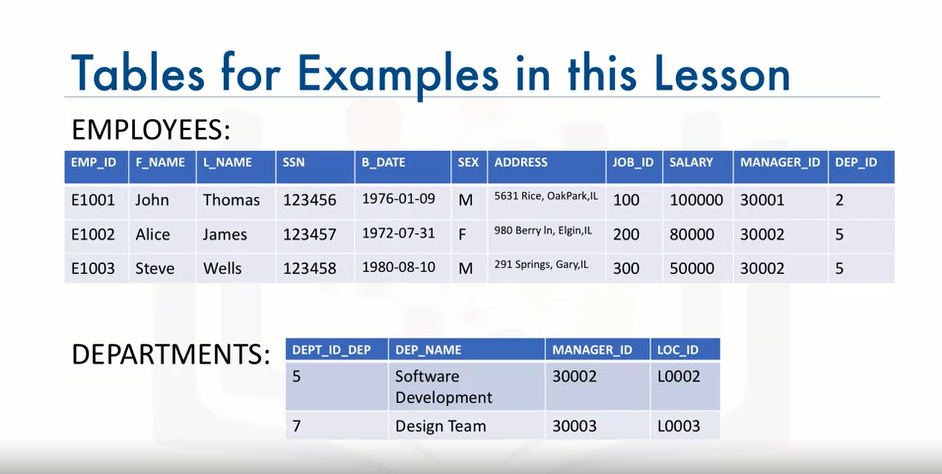

## what if i want to retrieve employees in location 'L0002' ??!!
* i don't have any location information in table employees but i can use deparments table as a sub query

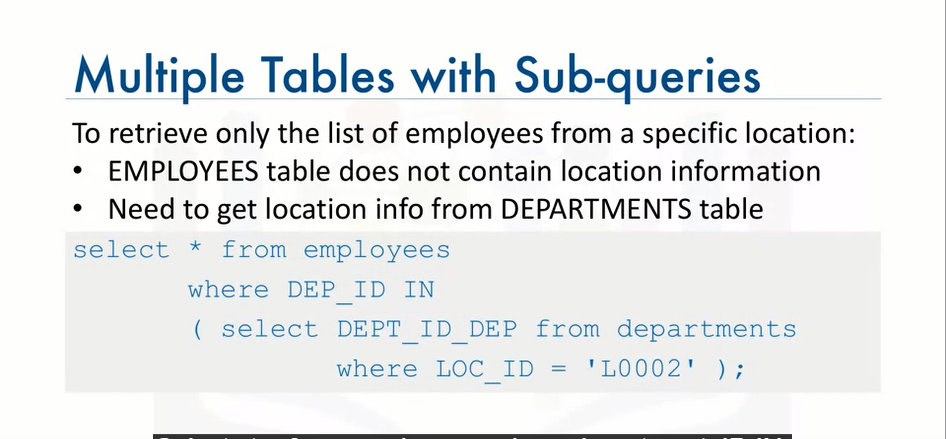

In [23]:
output=sql_i('''
SELECT DEPT_ID_DEP FROM DEPARTMENTS where LOC_ID='L0002'
''')
output

[('5',)]

In [24]:
output=sql_i('''
SELECT * FROM EMPLOYEES
    WHERE DEP_ID IN
    (SELECT DEPT_ID_DEP FROM DEPARTMENTS where LOC_ID='L0002')
''')
output=pd.DataFrame(output,columns=EMPLOYEES_cols)
output

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
1,E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000,30002,5
2,E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
3,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


##  what if i want to retrieve department ID and  department name for  emplyees who earn more than 70,000??!!
* i don't have any information about salary in deparments table  but i can use employees table as a sub query


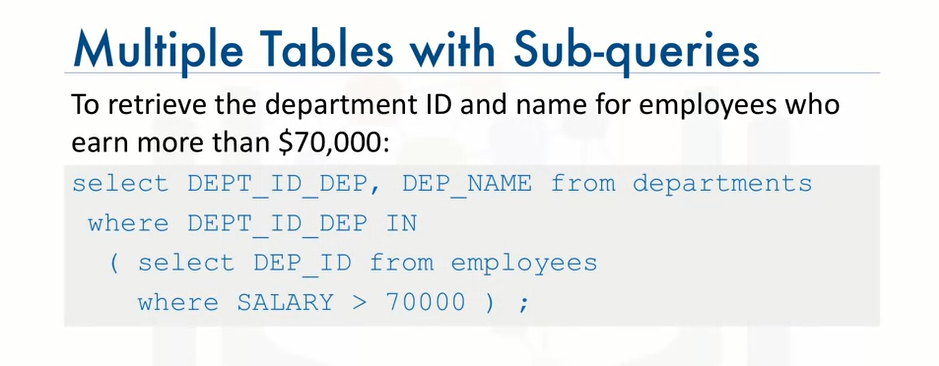

In [25]:
output=sql_i('''
select DEP_ID from employees where salary > 70000
''')
print(output)

[('2',), ('5',), ('2',)]


In [26]:
output=sql_i('''
select DEPT_ID_DEP, DEP_NAME from departments
    where DEPT_ID_DEP IN
    (select DEP_ID from employees where salary > 70000)
''')
output=pd.DataFrame(output,columns=['DEPT_ID_DEP','DEP_NAME'])
output

,DEPT_ID_DEP,DEP_NAME
0,2,Architect Group
1,5,Software Group


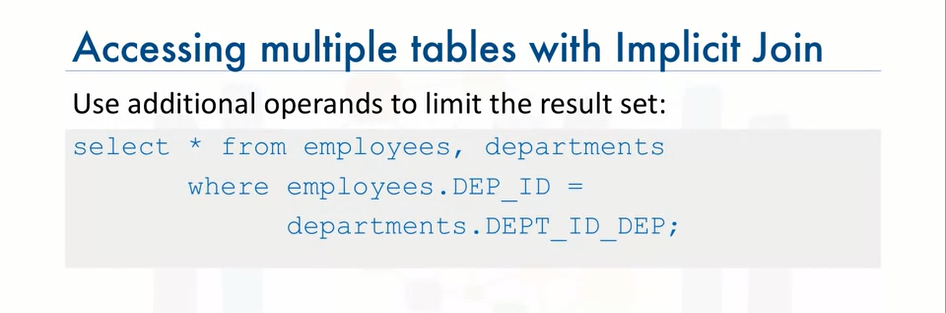

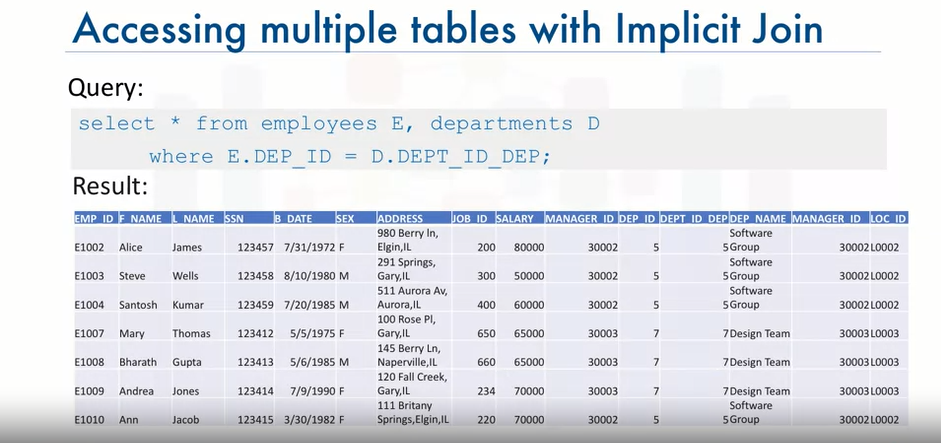

In [27]:
output=sql_i('''
select * from employees, departments
    where employees.DEP_ID = departments.DEPT_ID_DEP
''')
print(output)

[('E1001', 'John', 'Thomas', '123456', '1976-01-09', 'M', '5631 Rice, OakPark,IL', '100', 100000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1002', 'Alice', 'James', '123457', '1972-07-31', 'F', '980 Berry ln, Elgin,IL', '200', 80000, '30002', '5', '5', 'Software Group', '30002', 'L0002'), ('E1003', 'Steve', 'Wells', '123458', '1980-08-10', 'M', '291 Springs, Gary,IL', '300', 50000, '30002', '5', '5', 'Software Group', '30002', 'L0002'), ('E1004', 'Santosh', 'Kumar', '123459', '1985-07-20', 'M', '511 Aurora Av, Aurora,IL', '400', 60000, '30004', '5', '5', 'Software Group', '30002', 'L0002'), ('E1005', 'Ahmed', 'Hussain', '123410', '1981-01-04', 'M', '216 Oak Tree, Geneva,IL', '500', 70000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1006', 'Nancy', 'Allen', '123411', '1978-02-06', 'F', '111 Green Pl, Elgin,IL', '600', 90000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1007', 'Mary', 'Thomas', '123412', '1975-05-05', 'F', '100 Rose Pl, Ga

In [28]:
output=sql_i('''
select * from employees E, departments D
    where E.DEP_ID = D.DEPT_ID_DEP
''')
print(output)

[('E1001', 'John', 'Thomas', '123456', '1976-01-09', 'M', '5631 Rice, OakPark,IL', '100', 100000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1002', 'Alice', 'James', '123457', '1972-07-31', 'F', '980 Berry ln, Elgin,IL', '200', 80000, '30002', '5', '5', 'Software Group', '30002', 'L0002'), ('E1003', 'Steve', 'Wells', '123458', '1980-08-10', 'M', '291 Springs, Gary,IL', '300', 50000, '30002', '5', '5', 'Software Group', '30002', 'L0002'), ('E1004', 'Santosh', 'Kumar', '123459', '1985-07-20', 'M', '511 Aurora Av, Aurora,IL', '400', 60000, '30004', '5', '5', 'Software Group', '30002', 'L0002'), ('E1005', 'Ahmed', 'Hussain', '123410', '1981-01-04', 'M', '216 Oak Tree, Geneva,IL', '500', 70000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1006', 'Nancy', 'Allen', '123411', '1978-02-06', 'F', '111 Green Pl, Elgin,IL', '600', 90000, '30001', '2', '2', 'Architect Group', '30001', 'L0001'), ('E1007', 'Mary', 'Thomas', '123412', '1975-05-05', 'F', '100 Rose Pl, Ga

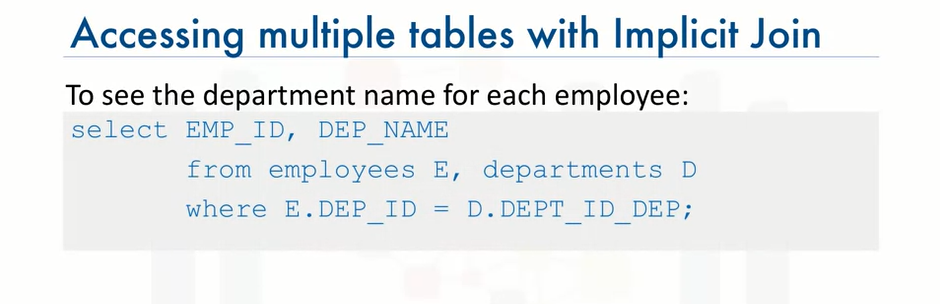

In [29]:
output=sql_i("select EMP_ID,F_NAME,L_NAME,DEP_NAME from employees E, departments D where E.DEP_ID = D.DEPT_ID_DEP")
output=pd.DataFrame(output,columns=('EMP_ID','F_NAME','L_NAME','DEP_NAME'))
output

,EMP_ID,F_NAME,L_NAME,DEP_NAME
0,E1001,John,Thomas,Architect Group
1,E1002,Alice,James,Software Group
2,E1003,Steve,Wells,Software Group
3,E1004,Santosh,Kumar,Software Group
4,E1005,Ahmed,Hussain,Architect Group
5,E1006,Nancy,Allen,Architect Group
6,E1007,Mary,Thomas,Design Team
7,E1008,Bharath,Gupta,Design Team
8,E1009,Andrea,Jones,Design Team
9,E1010,Ann,Jacob,Software Group


In [30]:
output=sql_i('''
select E.EMP_ID, E.F_NAME, E.L_NAME,D.DEP_NAME from employees E, departments D
    where E.DEP_ID = D.DEPT_ID_DEP
''')
output=pd.DataFrame(output,columns=('EMP_ID','F_NAME','L_NAME','DEP_NAME'))
output

,EMP_ID,F_NAME,L_NAME,DEP_NAME
0,E1001,John,Thomas,Architect Group
1,E1002,Alice,James,Software Group
2,E1003,Steve,Wells,Software Group
3,E1004,Santosh,Kumar,Software Group
4,E1005,Ahmed,Hussain,Architect Group
5,E1006,Nancy,Allen,Architect Group
6,E1007,Mary,Thomas,Design Team
7,E1008,Bharath,Gupta,Design Team
8,E1009,Andrea,Jones,Design Team
9,E1010,Ann,Jacob,Software Group


# TASK 

In [32]:
#Retrieve only the EMPLOYEES records that correspond to jobs in the JOBS table
output=sql_i('''
select * from employees where JOB_ID IN (select JOB_IDENT from jobs)
''')
output=pd.DataFrame(output,columns=EMPLOYEES_cols)
output

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1001,John,Thomas,123456,1976-01-09,M,"5631 Rice, OakPark,IL",100,100000,30001,2
1,E1002,Alice,James,123457,1972-07-31,F,"980 Berry ln, Elgin,IL",200,80000,30002,5
2,E1003,Steve,Wells,123458,1980-08-10,M,"291 Springs, Gary,IL",300,50000,30002,5
3,E1004,Santosh,Kumar,123459,1985-07-20,M,"511 Aurora Av, Aurora,IL",400,60000,30004,5
4,E1005,Ahmed,Hussain,123410,1981-01-04,M,"216 Oak Tree, Geneva,IL",500,70000,30001,2
5,E1006,Nancy,Allen,123411,1978-02-06,F,"111 Green Pl, Elgin,IL",600,90000,30001,2
6,E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
7,E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7
8,E1009,Andrea,Jones,123414,1990-07-09,F,"120 Fall Creek, Gary,IL",234,70000,30003,7
9,E1010,Ann,Jacob,123415,1982-03-30,F,"111 Britany Springs,Elgin,IL",220,70000,30004,5


In [33]:
#Retrieve only the list of employees whose JOB_TITLE is Jr. Designer
output=sql_i('''
select * from employees where JOB_ID IN (select JOB_IDENT from jobs where JOB_TITLE = 'Jr. Designer' )
''')
output=pd.DataFrame(output,columns=EMPLOYEES_cols)
output

,EMP_ID,F_NAME,L_NAME,SSN,B_DATE,SEX,ADDRESS,JOB_ID,SALARY,MANAGER_ID,DEP_ID
0,E1007,Mary,Thomas,123412,1975-05-05,F,"100 Rose Pl, Gary,IL",650,65000,30003,7
1,E1008,Bharath,Gupta,123413,1985-05-06,M,"145 Berry Ln, Naperville,IL",660,65000,30003,7


In [34]:
#Retrieve JOB information for emloyees who earn more than $70,000
output=sql_i('''
select * from jobs where JOB_IDENT IN (select JOB_ID from employees where SALARY > 70000 )
''')
output=pd.DataFrame(output,columns=jobs_col)
output

,JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY
0,100,Sr. Architect,60000,100000
1,200,Sr.Software Developer,60000,80000
2,600,Lead Architect,70000,100000


In [36]:
#Retrieve JOB information for female employees who earn more than $70,000
output=sql_i('''
select * from jobs where JOB_IDENT IN (select JOB_ID from employees where SALARY > 70000 and SEX='F' );
''')
output=pd.DataFrame(output,columns=jobs_col)
output

,JOB_IDENT,JOB_TITLE,MIN_SALARY,MAX_SALARY
0,200,Sr.Software Developer,60000,80000
1,600,Lead Architect,70000,100000


In [37]:
# retrieve  the Employee ID, Employee Name from employees table and Job Title from gobs table
output=sql_i('''
select E.EMP_ID,E.F_NAME,E.L_NAME, J.JOB_TITLE 
    from employees E, jobs J where 
    E.JOB_ID = J.JOB_IDENT;
''')
output=pd.DataFrame(output,columns=('EMP_ID','F_NAME','L_NAME','JOB_TITLE'))
output

,EMP_ID,F_NAME,L_NAME,JOB_TITLE
0,E1001,John,Thomas,Sr. Architect
1,E1002,Alice,James,Sr.Software Developer
2,E1003,Steve,Wells,Jr.Software Developer
3,E1004,Santosh,Kumar,Jr.Software Developer
4,E1005,Ahmed,Hussain,Jr. Architect
5,E1006,Nancy,Allen,Lead Architect
6,E1007,Mary,Thomas,Jr. Designer
7,E1008,Bharath,Gupta,Jr. Designer
8,E1009,Andrea,Jones,Sr. Designer
9,E1010,Ann,Jacob,Sr. Designer
